# Tugas Hands-On 2
oleh Muhammad Ghiffari Iskandar - 122140189

## Soal 1 - Simulasi Sinyal PPG

### a. Buktikanlah bahwa proses downsampling pada sinyal PPG akan menghilangkan informasi dari sinyal asi. Lakukan downsampling dari 150Hz ke 100Hz, 50Hz, 25Hz, 10Hz, hingga 5Hz. Jelaskan apa yang terjadi dan buktikan bahwa semakin rendah sampling frequency (fs) maka sinyal akan semakin terdistorsi dan terdapat `Aliasing` pada sinyal hasil downsampling. Jelaskan apa itu `Aliasing`


In [1]:
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import decimate, resample

Skipping random IBI modulation, since the offset_weight 0.89 leads to physiologically implausible wave durations of 74.2499999999997 milliseconds.


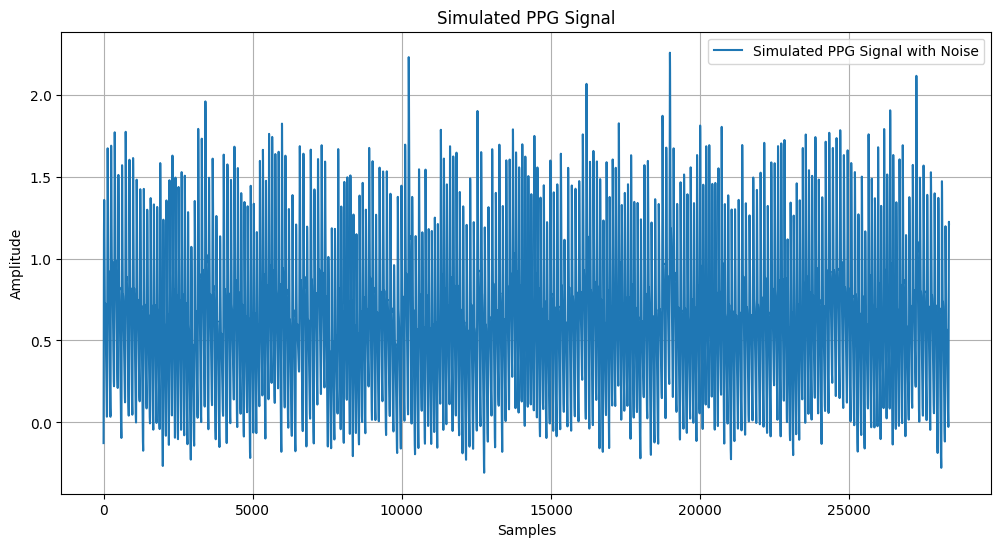

In [2]:
# Prompting "buatkan kode program simulasi sinyal PPG menggunakan 
# library neurokit2.ppg_simulate dengan ketentuan berikut: Durasi 
# 189 sekon, sampling rate 150 Hz, Noise level 0.89, Heart rate 80 
# BPM, Random state 260504"

# Simulate PPG signal
ppg = nk.ppg_simulate(duration=189,         # Durasi dalam detik
                     sampling_rate=150,     # Sampling rate dalam Hz
                     ibi_randomness=0.89,   # Noise level
                     heart_rate=80,         # Heart rate dalam beats per minute
                     random_state=260504)   # Random state

# Plot the simulated PPG signal
plt.figure(figsize=(12, 6))
plt.plot(ppg, label='Simulated PPG Signal with Noise')
plt.title('Simulated PPG Signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

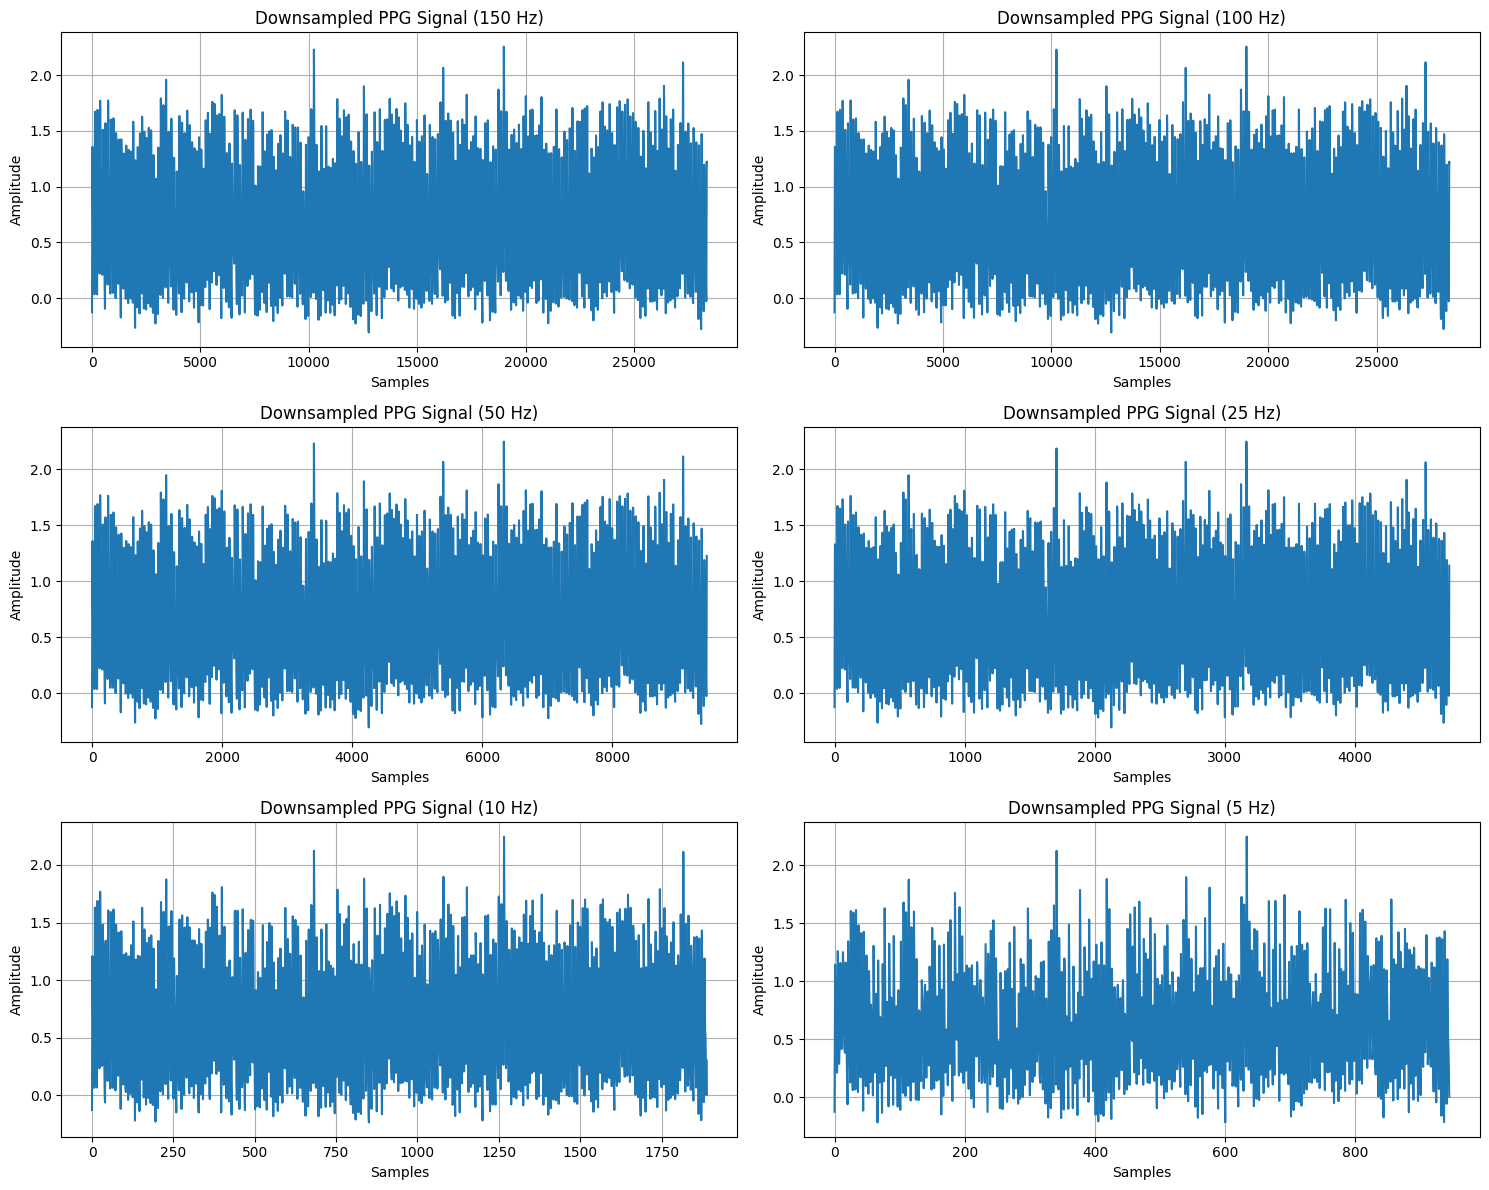

In [3]:
# Create downsampling factors
original_sr = 150
target_srs = [150, 100, 50, 25, 10, 5]

# Create subplots
plt.figure(figsize=(15, 12))

for i, target_sr in enumerate(target_srs, 1):
    # Calculate downsample factor
    downsample_factor = original_sr // target_sr
    
    # Downsample the signal
    ppg_downsampled = ppg[::downsample_factor]
    
    # Plot
    plt.subplot(3, 2, i)
    plt.plot(ppg_downsampled)
    plt.title(f'Downsampled PPG Signal ({target_sr} Hz)')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.grid(True)

plt.tight_layout()
plt.show()


Berdasarkan 6 plot downscaling di atas, sinyal yang dihasilkan semakin memudar sampelnya atau terdistorsi dikarenakan berkurangnya sampel yang diambil melalui downscaling sehingga terjadi aliasing pada sinyal hasil. Aliasing merupakan fenomena sinyal yang disampling tidak cukup cepat sehingga hasil sampling terlihat memiliki frekuensi yang lebih rendah dari yang sebenarnya [ChatGPT]

[ChatGPT]: https://chatgpt.com/share/680820d1-ef48-8011-8812-1d5426654f02. 

Aliasing bisa digambarkan seperti ketidaklengkapan data pada sinyal setelah proses downsampling.

### b. Ketika kamu melakukan filtering, terdapat parameter `order` saat kamu melakukan filtering. Apa maksudnya dari `order` dan apa yang akan terjadi jika kamu mengganti nilai order terhadap sinyal?

order dalam filtering merupakan istilah yang merepresentasikan kompleksitas atau ketajaman dari sebuah metode filtering sinyal. Jika kita mengganti nilai order, maka pengaruh yang akan terjadi pada sinyal berupa cutoff sinyal pada frekuensi tertentu tergantung nilai orde yang ditetapkan. Semakin tinggi nilai orde, semakin presisi juga frekuensi yang dipotong atau dipisahkan dari data sinyal asli.

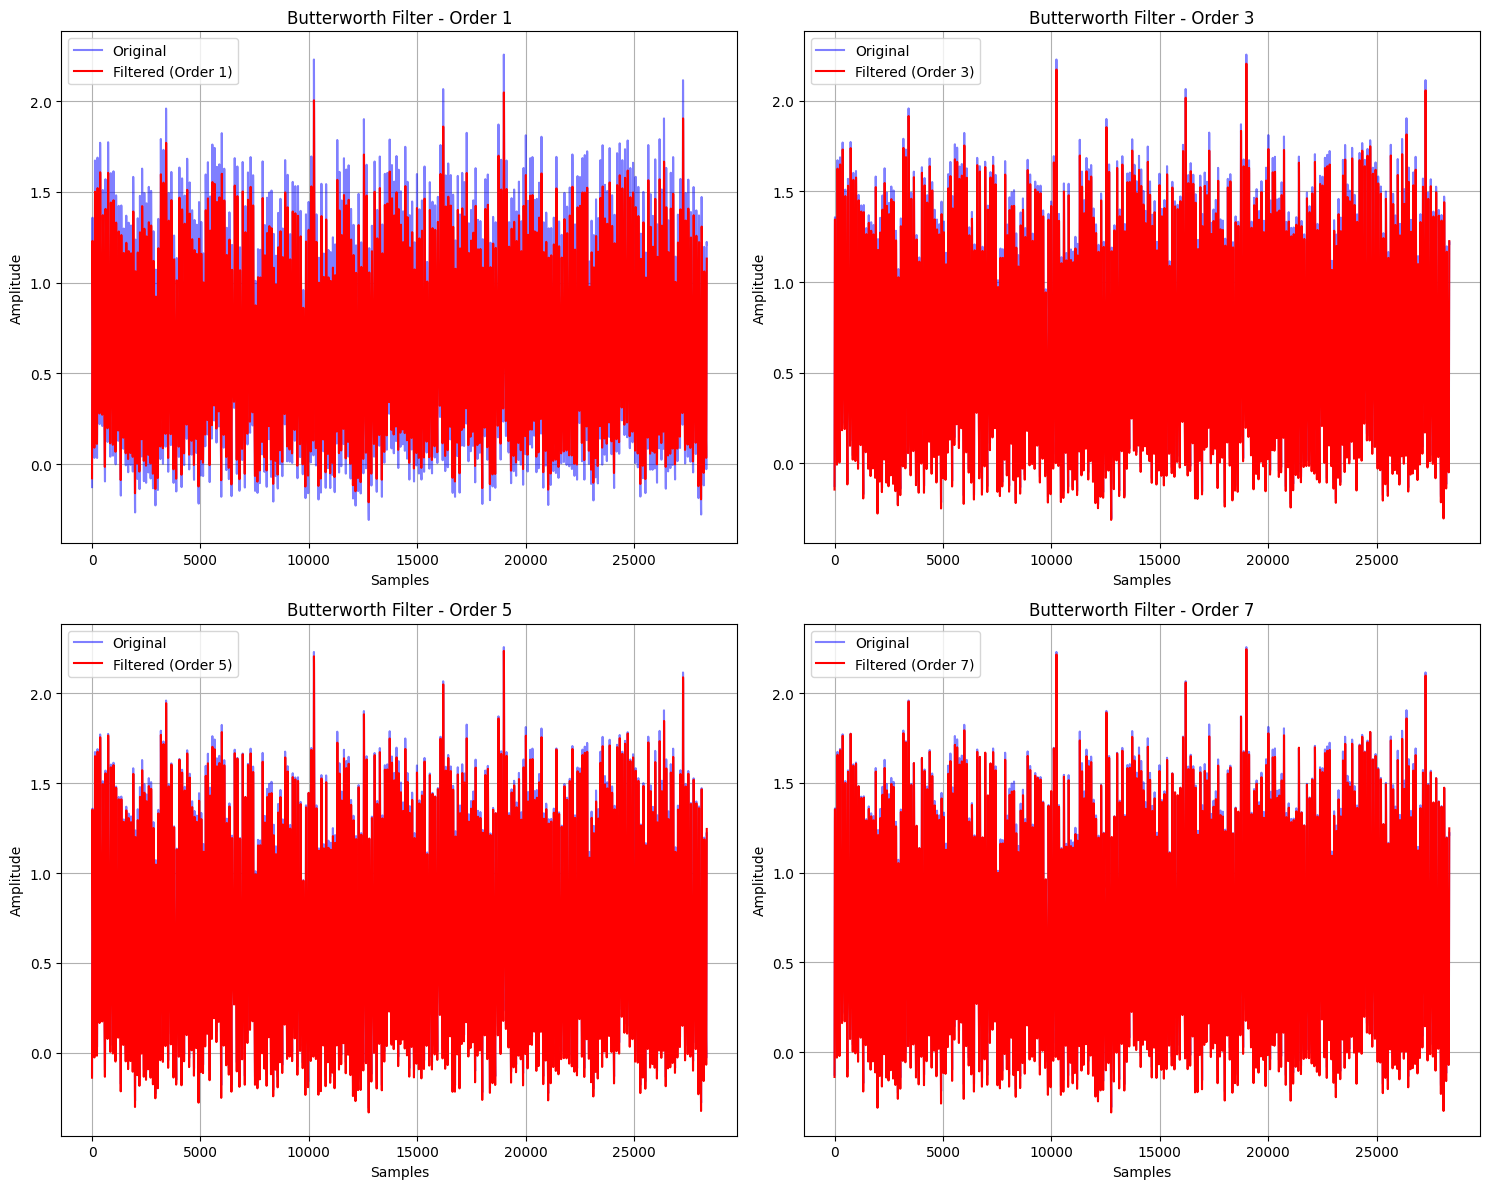

In [4]:
from scipy import signal

# Define filter parameters
nyquist = 150 / 2  # Nyquist frequency
cutoff = 5  # Cutoff frequency in Hz
orders = [1, 3, 5, 7]  # Different filter orders to compare

# Create subplots
plt.figure(figsize=(15, 12))

for i, order in enumerate(orders, 1):
    # Design Butterworth lowpass filter
    b, a = signal.butter(order, cutoff/nyquist, 'low')
    
    # Apply filter
    filtered_signal = signal.filtfilt(b, a, ppg)
    
    # Plot
    plt.subplot(2, 2, i)
    plt.plot(ppg, 'b-', alpha=0.5, label='Original')
    plt.plot(filtered_signal, 'r-', label=f'Filtered (Order {order})')
    plt.title(f'Butterworth Filter - Order {order}')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

Pada hasil plot berikut, setelah dilakukan filtering dengan nilai orde, sinyal yang divisualisasikan dipengaruhi oleh nilai orde yang diberikan.